# Using Python to plot charts from MT5's data feed
*algorembrant*

## mplfinance


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


MT5 initialized successfully
                         Open      High       Low     Close  tick_volume  \
time                                                                       
2025-11-14 12:50:00  4116.150  4119.670  4112.365  4112.365         2651   
2025-11-14 12:55:00  4112.460  4117.170  4109.665  4116.161         2824   
2025-11-14 13:00:00  4116.120  4118.823  4108.284  4108.498         5862   
2025-11-14 13:05:00  4108.456  4111.840  4105.270  4107.378         4074   
2025-11-14 13:10:00  4107.482  4108.081  4084.339  4086.187         6211   

                     spread  real_volume  Volume   Delta  
time                                                      
2025-11-14 12:50:00     160            0    2651     0.0  
2025-11-14 12:55:00     160            0    2824  2824.0  
2025-11-14 13:00:00     160            0    5862 -5862.0  
2025-11-14 13:05:00     160            0    4074 -4074.0  
2025-11-14 13:10:00     160            0    6211 -6211.0  


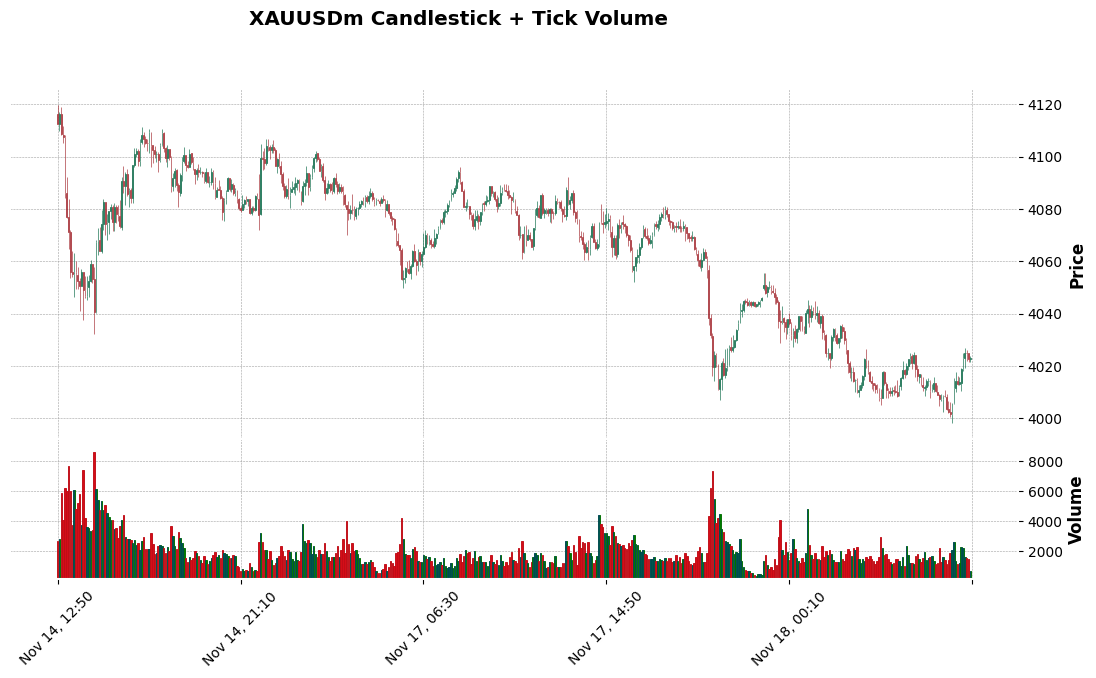

In [12]:
!pip install MetaTrader5 --quiet
!pip install pandas --quiet
!pip install mplfinance --quiet

# -----------------------------
# IMPORTS
# -----------------------------
import MetaTrader5 as mt
import pandas as pd
import mplfinance as mpf

# -----------------------------
# 1. CONNECT TO MT5
# -----------------------------
if not mt.initialize():
    print("MT5 initialization failed")
else:
    print("MT5 initialized successfully")

symbol = "XAUUSDm"  # change to your broker's symbol
timeframe = mt.TIMEFRAME_M5  # 5-minute candles
num_candles = 500            # number of candles to fetch

# -----------------------------
# 2. FETCH DATA
# -----------------------------
rates = mt.copy_rates_from_pos(symbol, timeframe, 0, num_candles)

# Convert to DataFrame
df = pd.DataFrame(rates)
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)

# -----------------------------
# 3. PREPARE COLUMNS
# -----------------------------
# OHLC
df.rename(columns={
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close'
}, inplace=True)

# Tick volume (proxy for real volume)
df['Volume'] = df['tick_volume']

# Optional: Approximate Buy/Sell delta using candle direction
# +delta if candle closes up, -delta if candle closes down
df['Delta'] = df['Volume'] * df['Close'].diff().fillna(0).apply(lambda x: 1 if x>0 else (-1 if x<0 else 0))

print(df.head())
# -----------------------------
# 4. PLOT CANDLES + VOLUME
# -----------------------------
mpf.plot(
    df,
    type='candle',
    style='charles',
    volume=True,
    title=f"{symbol} Candlestick + Tick Volume",
    ylabel="Price",
    ylabel_lower="Volume",
    figsize=(14,7),
    addplot=[
        mpf.make_addplot(df['Delta'], type='bar', width=0.7, panel=1, color='b', alpha=0.3, secondary_y=False)
    ]
)


## matplotlib


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


                         Open      High       Low     Close  tick_volume  \
time                                                                       
2025-11-14 12:50:00  4116.150  4119.670  4112.365  4112.365         2651   
2025-11-14 12:55:00  4112.460  4117.170  4109.665  4116.161         2824   
2025-11-14 13:00:00  4116.120  4118.823  4108.284  4108.498         5862   
2025-11-14 13:05:00  4108.456  4111.840  4105.270  4107.378         4074   
2025-11-14 13:10:00  4107.482  4108.081  4084.339  4086.187         6211   

                     spread  real_volume  Volume   Delta  
time                                                      
2025-11-14 12:50:00     160            0    2651     0.0  
2025-11-14 12:55:00     160            0    2824  2824.0  
2025-11-14 13:00:00     160            0    5862 -5862.0  
2025-11-14 13:05:00     160            0    4074 -4074.0  
2025-11-14 13:10:00     160            0    6211 -6211.0  


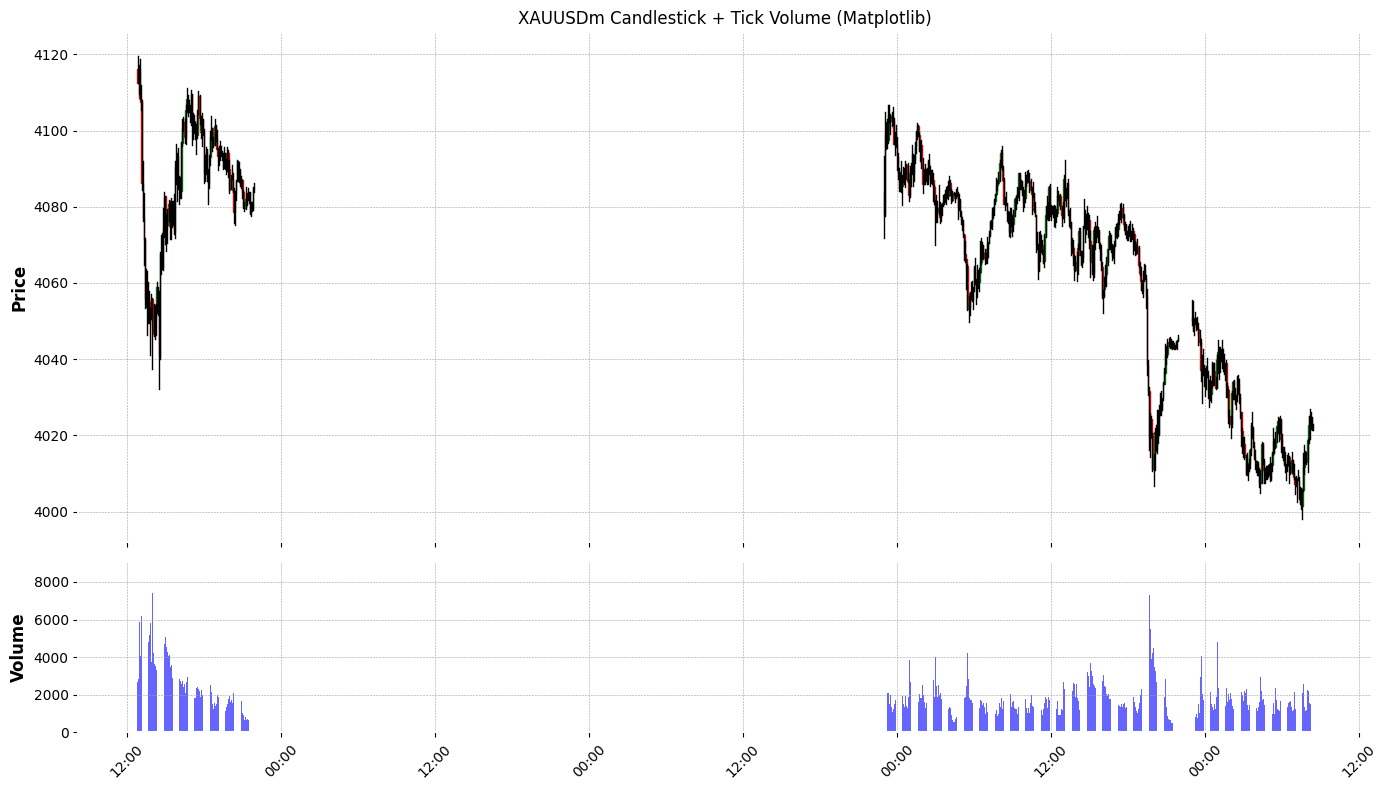

In [11]:
!pip install MetaTrader5 --quiet
!pip install pandas --quiet
!pip install matplotlib --quiet

import MetaTrader5 as mt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# -----------------------------
# 1. CONNECT TO MT5
# -----------------------------
mt.initialize()
symbol = "XAUUSDm"
timeframe = mt.TIMEFRAME_M5
num_candles = 500

# -----------------------------
# 2. FETCH DATA
# -----------------------------
rates = mt.copy_rates_from_pos(symbol, timeframe, 0, num_candles)
df = pd.DataFrame(rates)
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)

# -----------------------------
# 3. PREPARE DATA
# -----------------------------
df.rename(columns={
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close'
}, inplace=True)

# Tick volume
df['Volume'] = df['tick_volume']

# Delta approximation (+ if candle up, - if down)
df['Delta'] = df['Volume'] * df['Close'].diff().fillna(0).apply(lambda x: 1 if x>0 else (-1 if x<0 else 0))

print(df.head())

# -----------------------------
# 4. PLOT CANDLES + VOLUME
# -----------------------------
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,8), sharex=True, gridspec_kw={'height_ratios':[3,1]})

# Candles
for idx, row in df.iterrows():
    color = 'green' if row['Close'] >= row['Open'] else 'red'
    ax1.plot([idx, idx], [row['Low'], row['High']], color='black', linewidth=1)        # wick
    ax1.add_patch(plt.Rectangle((mdates.date2num(idx)-0.001, row['Open']),
                                0.002, row['Close']-row['Open'], color=color))      # body

ax1.set_ylabel('Price')
ax1.set_title(f"{symbol} Candlestick + Tick Volume (Matplotlib)")
ax1.grid(True)

# Volume bars
ax2.bar(df.index, df['Volume'], color='blue', alpha=0.6, width=0.002)
ax2.set_ylabel('Volume')
ax2.grid(True)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## plotly

                         Open      High       Low     Close  Volume  spread  \
time                                                                          
2025-11-14 12:55:00  4112.460  4117.170  4109.665  4116.161    2824     160   
2025-11-14 13:00:00  4116.120  4118.823  4108.284  4108.498    5862     160   
2025-11-14 13:05:00  4108.456  4111.840  4105.270  4107.378    4074     160   
2025-11-14 13:10:00  4107.482  4108.081  4084.339  4086.187    6211     160   
2025-11-14 13:15:00  4086.215  4092.021  4076.386  4077.031    5987     160   

                     real_volume   Delta  
time                                      
2025-11-14 12:55:00            0  2824.0  
2025-11-14 13:00:00            0 -5862.0  
2025-11-14 13:05:00            0 -4074.0  
2025-11-14 13:10:00            0 -6211.0  
2025-11-14 13:15:00            0 -5987.0  



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


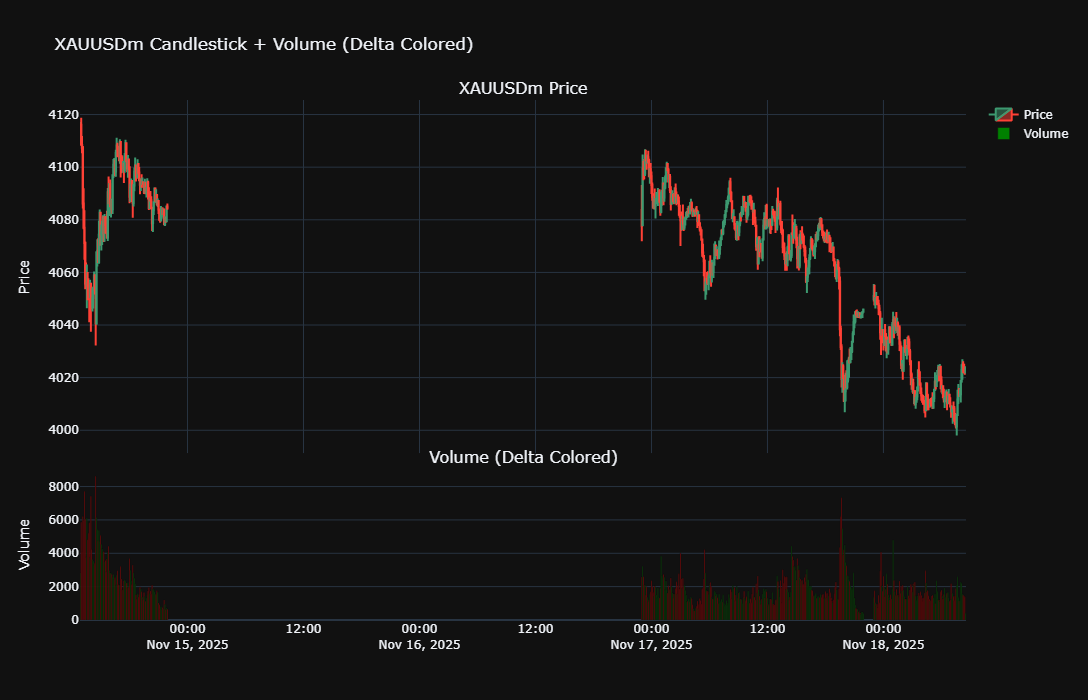

In [16]:
# Install dependencies if needed
!pip install MetaTrader5 plotly pandas --quiet

# -----------------------------
# IMPORTS
# -----------------------------
import MetaTrader5 as mt
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# -----------------------------
# 1. CONNECT TO MT5
# -----------------------------
if not mt.initialize():
    raise RuntimeError("MT5 initialization failed")
symbol = "XAUUSDm"           # Change to your broker's symbol
timeframe = mt.TIMEFRAME_M5  # 5-minute candles
num_candles = 500            # Number of candles to fetch

# -----------------------------
# 2. FETCH DATA
# -----------------------------
rates = mt.copy_rates_from_pos(symbol, timeframe, 0, num_candles)
df = pd.DataFrame(rates)
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)

# OHLC + tick volume
df.rename(columns={
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'tick_volume': 'Volume'
}, inplace=True)

# -----------------------------
# 3. CALCULATE DELTA
# -----------------------------
# Simple delta: +Volume if candle up, -Volume if candle down, 0 if neutral
df['Delta'] = df.apply(
    lambda row: row['Volume'] if row['Close'] > row['Open'] 
    else (-row['Volume'] if row['Close'] < row['Open'] else 0),
    axis=1
)

print(df.head())
# -----------------------------
# 4. CREATE PLOTLY FIGURE WITH TWO PANES
# -----------------------------
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    row_heights=[0.7, 0.3],
    subplot_titles=(f'{symbol} Price', 'Volume (Delta Colored)')
)

# Candlestick trace (top pane)
fig.add_trace(go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name='Price'
), row=1, col=1)

# Volume trace (bottom pane), colored by delta
colors = ['green' if d > 0 else ('red' if d < 0 else 'gray') for d in df['Delta']]
fig.add_trace(go.Bar(
    x=df.index,
    y=df['Volume'],
    marker_color=colors,
    name='Volume'
), row=2, col=1)

# -----------------------------
# 5. LAYOUT
# -----------------------------
fig.update_layout(
    title=f'{symbol} Candlestick + Volume (Delta Colored)',
    xaxis_rangeslider_visible=False,
    template='plotly_dark',
    height=700
)

# Set axis labels
fig.update_yaxes(title_text="Price", row=1, col=1)
fig.update_yaxes(title_text="Volume", row=2, col=1)

fig.update_layout(
    xaxis_rangeslider_visible=True  # adds scrollable slider
)

fig.update_xaxes(
    rangeslider_visible=True,
    rangeslider_thickness=0.05  # height of the slider
)


fig.show()